# Online Ticket Sales

## 1. Executive Summary
The TICKIT website is a fictional online selling ticket platform. The aim of this project is to track sales activities (ticket movement over time). Our manager wants to see how the sales changed from month to month and what contributed to those changes. He also wants to see how location plays a role in the types of ticket sold. Therefore, he wants us to do some analysis and present him a report based on the following questions:

* What was the revenue, profit, and number of tickets sold in 2008?
* What were the monthly sales by event category?
* What are the top 10 states with the highest sales?
* What are the top cities in total quantity sold by category group?

## 2. The Data

### 2.1 About the datasets
Data source: [aws.amazon.com](https://docs.aws.amazon.com/redshift/latest/dg/c_sampledb.html)

This database consists of 7 tables including: category, date, event, venue, users, listing, and sales as illustrated below:

<br>
<img src="tickitdb.png">

Image source: [aws.amazon.com](https://docs.aws.amazon.com/redshift/latest/dg/c_sampledb.html)


## What was the revenue, profit, and number of tickets sold in 2008?

The total revenue for the year 2008 was **272.76 millions usd**, with a total profit of **256.14 millions usd**, and with a total quantity sold of **345.35 thousands usd**.

In [3]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
-- Total Revenue, Total Profit, Total Number of Tickets Sold
SELECT
    SUM(s.qtysold * s.pricepaid) AS revenue,
    ROUND(SUM(s.qtysold * s.pricepaid) - SUM(s.commission)) AS profit,
    SUM(s.qtysold) AS number_of_tickets_sold
FROM `anly-6250-368220.tickitdb.sales` AS s;

,revenue,profit,number_of_tickets_sold
0,272756935,256142120,345349


## What were the monthly sales by event category

both the number of tickets sold for concerts and shows experienced small and large
fluctuations. However, concerts sales were always higher than shows in all months
of the year 2008. 

The sales for concerts tickets grew steadly during the first three months of the
year with a cumulative growth rate of 91.72%, after which they fluctuated between
roughly 14,342K and 14,... from March to June. However, the sales rose to their 
highest point in July with about .... This figure then dropped again to 
approximately their March level,where it remained until it fell sharply at the 
end of the year at a cumulative growth of -66.11%.

There was an upward trend from January to March of .... to .... for shows ticket 
sales. After a steep drop of -15.62% (or to ....) growth rate in April. However,
this number stayed at this level until it rebounds, reaching nearly the same level
as in March at 12,270K. However, this amount sharply dropped from October to
December.

In [1]:
-- Monthly Sales by Category Group
SELECT
    d.month,
    c.catgroup,
    SUM(s.qtysold * s.pricepaid) AS revenue
FROM tickitdb.sales AS s
INNER JOIN tickitdb.date AS d
    ON s.dateid = d.dateid
INNER JOIN tickitdb.events AS e
    ON s.eventid = e.eventid
INNER JOIN tickitdb.category AS c
    ON e.catid = c.catid
GROUP BY d.month, c.catgroup
ORDER BY revenue DESC;

,month,catgroup,revenue
0,JUL,Concerts,15831787
1,MAY,Concerts,15182752
2,APR,Concerts,14566931
3,SEP,Concerts,14422808
4,JUN,Concerts,14363412
5,MAR,Concerts,14342236
6,AUG,Concerts,14326421
7,OCT,Concerts,13965314
8,OCT,Shows,12269666
9,MAR,Shows,12227320


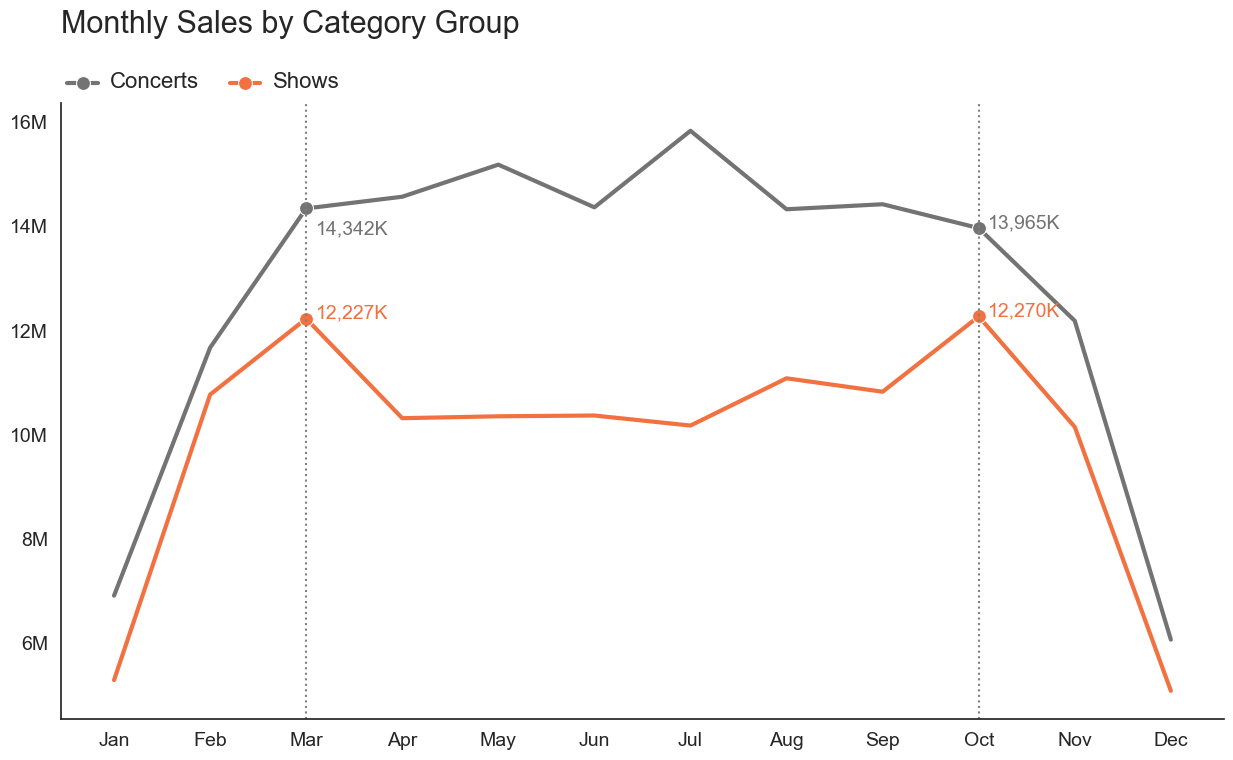

In [4]:
# Months of the numbers
months = {"JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6,
          "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12}

# Adding the numbers to the dataframe
monthly_sales_cat["month_num"] = [months[i] for i in monthly_sales_cat["month"] if i in list(months.keys())]

# sorting values in monthly sales cat dataframe
monthly_sales_cat = monthly_sales_cat.sort_values(by="month_num", ascending=True)

# splitting the data into concerts and shows
df_concerts = monthly_sales_cat[monthly_sales_cat["catgroup"] == "Concerts"]
df_shows = monthly_sales_cat[monthly_sales_cat["catgroup"] == "Shows"]

# Plotting the result
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sns.set()
sns.set_style('white')

fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(x="month_num", y="revenue", data=df_concerts,
             marker="o", ms=10, markevery=[2,9], ci=None, linewidth=3, color="#737373", label="Concerts")
sns.lineplot(x="month_num", y="revenue", data=df_shows,
             marker="o", ms=10, markevery=[2,9], ci=None, linewidth=3, color="#F27141", label="Shows")
sns.despine()
plt.title("Monthly Sales by Category Group", fontsize=22, loc="left", y=1.10)
ylabels = ['{:,.0f}'.format(round(y)) + 'M' for y in ax.get_yticks()/1000000]

ax.set_yticklabels(ylabels)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(month_names)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("")
plt.ylabel("")

plt.annotate('{:,.0f}'.format(int(df_concerts.loc[df_concerts.month_num == 3, "revenue"])/1000) + 'K',
             xy=(3.1, int(df_concerts.loc[df_concerts.month_num == 3, "revenue"])-500000),
             fontsize=14, color="#737373")
plt.annotate('{:,.0f}'.format(int(df_concerts.loc[df_concerts.month_num == 10, "revenue"])/1000) + 'K',
             xy=(10.1, int(df_concerts.loc[df_concerts.month_num == 10, "revenue"])),
             fontsize=14, color="#737373")
plt.annotate('{:,.0f}'.format(int(df_shows.loc[df_shows.month_num == 3, "revenue"])/1000) + 'K',
             xy=(3.1, int(df_shows.loc[df_shows.month_num == 3, "revenue"])),
             fontsize=14, color="#F27141")
plt.annotate('{:,.0f}'.format(int(df_shows.loc[df_shows.month_num == 10, "revenue"])/1000) + 'K',
             xy=(10.1, int(df_shows.loc[df_shows.month_num == 10, "revenue"])),
             fontsize=14, color="#F27141")

plt.axvline(x = 3, color = 'grey', linestyle = ':')
plt.axvline(x = 10, color = 'grey', linestyle = ':')
#plt.text(3.2, 5500000, """
#There was a huge increase in sales for both Concerts and Shows tickets
#from January to March. Sales for Concerts kept increasing from there
#while there was a decrease for Shows. Then we saw both tickets hugely
#dropping in sales from October to December. Our peak period for both
#Concerts and Shows mays between March and October.
#""", fontsize=14)

legend = ax.legend(loc="upper left",
                   bbox_to_anchor=(0, 1.06),
                   ncol=2,
                   borderaxespad=0,
                   frameon=False)

for text in legend.get_texts():
    text.set_fontsize(16)


plt.show()

### Revenue Percentage Change over the months for Concerts

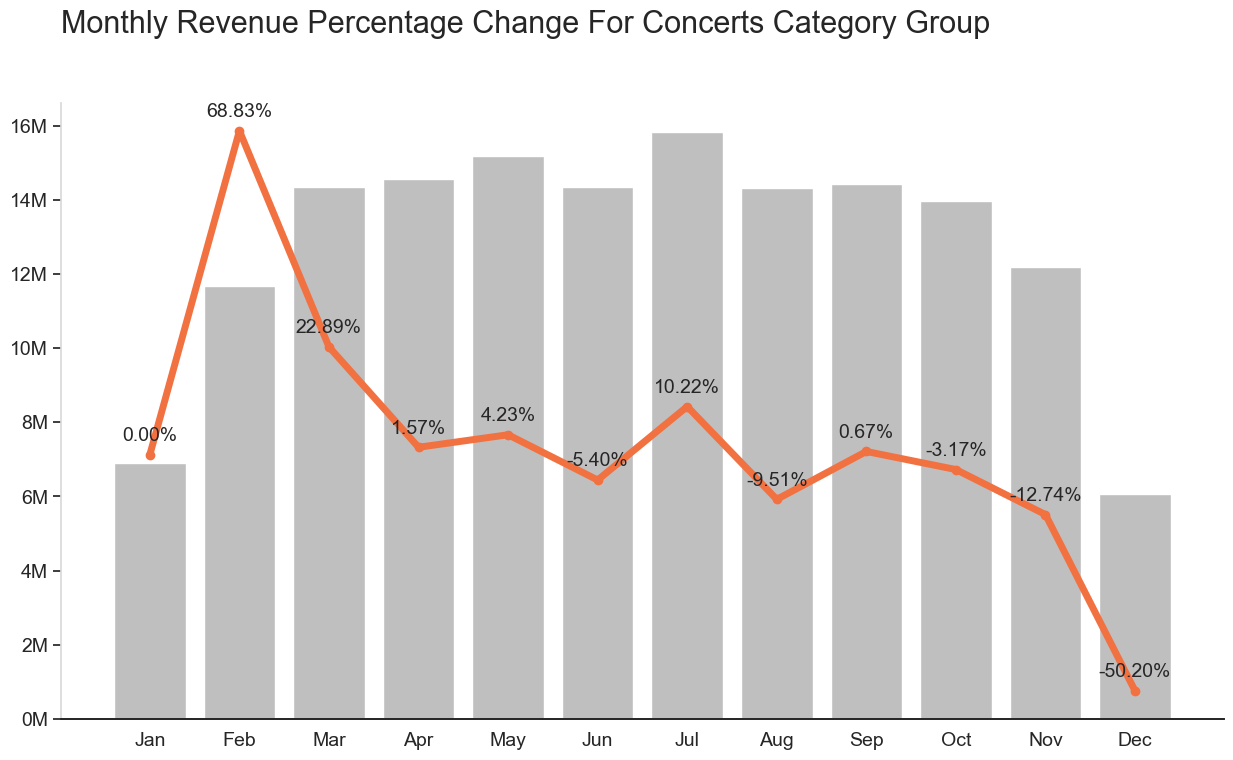

In [9]:
# Adding the percentage change column concerts
df_concerts["Revenue_Percentage_Change"] = df_concerts.revenue.pct_change().fillna(0)

# Adding the percentage change column for shows
df_shows["Revenue_Percentage_Change"] = df_shows.revenue.pct_change().fillna(0)

# Plotting
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sns.set()
sns.set_style('white')

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(df_concerts.month_num, df_concerts.revenue, color="#BFBFBF")
plt.title("Monthly Revenue Percentage Change For Concerts Category Group", fontsize=22, loc="left", y=1.10)
ylabels = ['{:,.0f}'.format(round(y)) + 'M' for y in ax.get_yticks()/1000000]
ax.spines['left'].set_color('#D9D9D9')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels(ylabels)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(month_names)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = ax.twinx()

ax2.plot(df_concerts.month_num, df_concerts.Revenue_Percentage_Change,
         color="#F27141", linewidth=5, marker='o')
plt.tick_params(right = False , labelright = False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for x, y in zip(df_concerts.month_num, df_concerts.Revenue_Percentage_Change):
    label = "{:,.2f}".format(y*100) + '%'
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=14)


plt.show()

### Revenue Percentage Change over the months for Shows

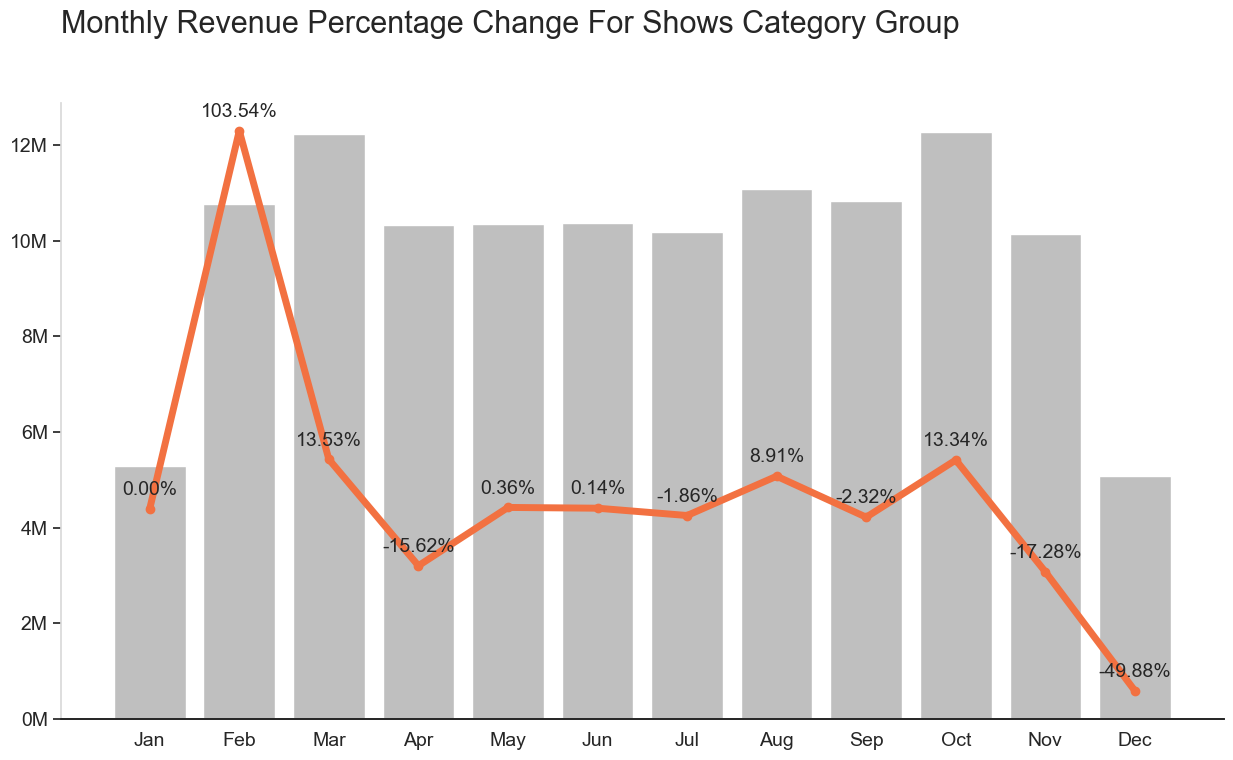

In [10]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sns.set()
sns.set_style('white')

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(df_shows.month_num, df_shows.revenue, color="#BFBFBF")
plt.title("Monthly Revenue Percentage Change For Shows Category Group", fontsize=22, loc="left", y=1.10)
ylabels = ['{:,.0f}'.format(round(y)) + 'M' for y in ax.get_yticks()/1000000]
ax.spines['left'].set_color('#D9D9D9')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels(ylabels)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(month_names)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = ax.twinx()

ax2.plot(df_shows.month_num, df_shows.Revenue_Percentage_Change,
         color="#F27141", linewidth=5, marker='o')
plt.tick_params(right = False , labelright = False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for x, y in zip(df_shows.month_num, df_shows.Revenue_Percentage_Change):
    label = "{:,.2f}".format(y*100) + '%'
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=14)


plt.show()

## What are the 10 popular states with the highest sales

The state of New York had substantially more ticket sales than the rest of the states. The closest state (california) sold 47,468 tickets compared to New York's 110,373. See the graph below.

In [1]:
-- 10 Most popular states with the highest sales
WITH sales_by_states AS (
    SELECT
        v.venuestate,
        SUM(s.qtysold) AS total_sold
    FROM tickitdb.sales AS s
    INNER JOIN tickitdb.events AS e
        ON s.eventid = e.eventid
    INNER JOIN tickitdb.venue AS v
        ON e.venueid = v.venueid
    GROUP BY v.venuestate
)
SELECT
    *,
    RANK() OVER(ORDER BY total_sold DESC) AS ranks
FROM sales_by_states
ORDER BY ranks;

,venuestate,total_sold,ranks
0,NY,110373,1
1,CA,47468,2
2,TX,16730,3
3,OH,12419,4
4,NV,12328,5
5,FL,10947,6
6,PA,10022,7
7,IL,9524,8
8,MD,7601,9
9,MI,7556,10


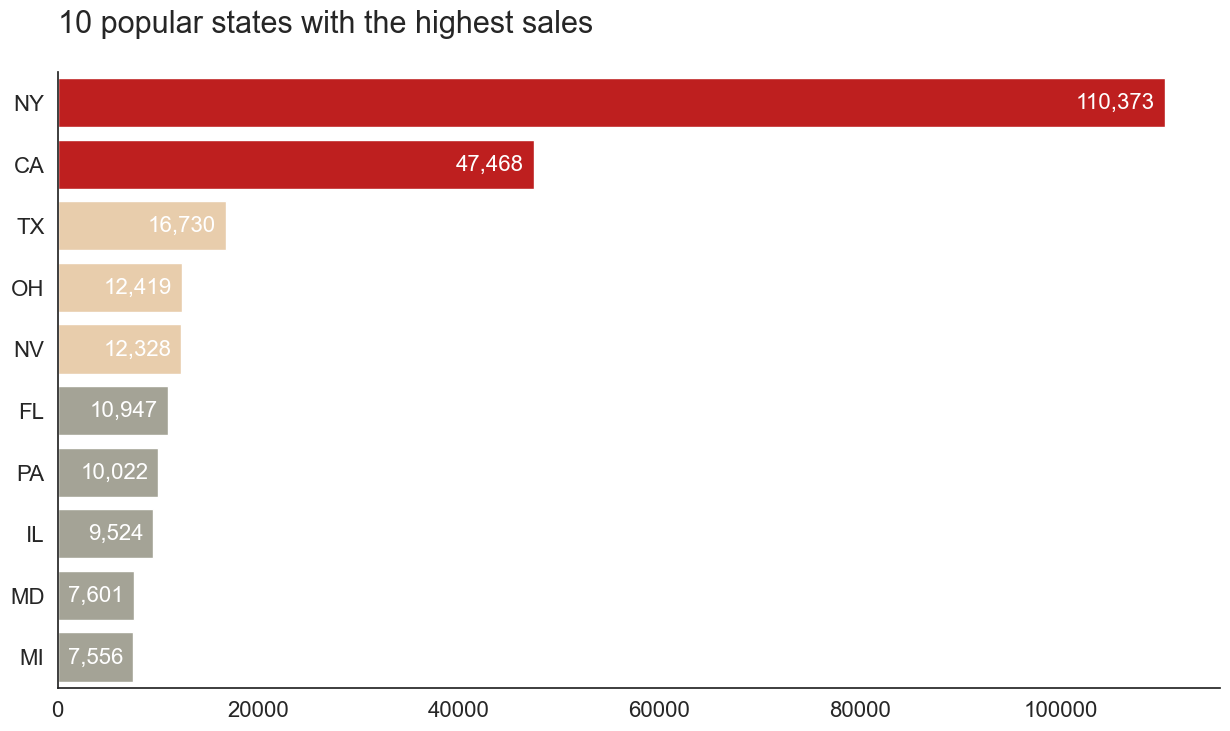

In [12]:

sns.set()
sns.set_style("white")
sns.set_palette(["#D90404", "#D90404", "#F2CEA2", "#F2CEA2", "#F2CEA2",
                 "#A6A594", "#A6A594", "#A6A594", "#A6A594", "#A6A594"])

fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.barplot(x="total_sold", y="venuestate", data=popular_states)
sns.despine()
ax.set_title("10 popular states with the highest sales",
             fontsize=22, loc="left", y=1.05)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for i in range(len(popular_states.index)):
    plt.text(popular_states.total_sold[i]-1000, i, "{:,.0f}".format(popular_states.total_sold[i]),
             ha='right', va='center', fontsize=16, color='white')

plt.show()

## What are the top cities in total quantity sold by category group?

Despite revenue being higher for concerts, the top city (based on ticket sales) is made up of 99,880 tickets from shows. When we drilled down on the data, we saw that New York City is taking up the majority of sales for the shows category, most of the remaining state's ticket sales are from concerts.

In [13]:
-- Popular cities
SELECT
    t.city,
    d.group_cat,
    t.total_sold AS total_sold,
    d.total_sold AS total_sold_by_cat,
    DENSE_RANK() OVER(ORDER BY t.total_sold DESC) AS ranks
FROM (
    SELECT
        v.venuecity AS city,
        c.catgroup AS group_cat,
        SUM(s.qtysold) AS total_sold
    FROM `anly-6250-368220.tickitdb.sales` AS s
    INNER JOIN `anly-6250-368220.tickitdb.events` AS e
        ON s.eventid = e.eventid
    INNER JOIN `anly-6250-368220.tickitdb.category` AS c
        ON e.catid = c.catid
    INNER JOIN `anly-6250-368220.tickitdb.venue` AS v
        ON e.venueid = v.venueid
    GROUP BY v.venuecity, c.catgroup
) AS d
LEFT JOIN (
    SELECT
        v.venuecity AS city,
        SUM(s.qtysold) AS total_sold
    FROM `anly-6250-368220.tickitdb.sales` AS s
    INNER JOIN `anly-6250-368220.tickitdb.events` AS e
        ON s.eventid = e.eventid
    INNER JOIN `anly-6250-368220.tickitdb.category` AS c
        ON e.catid = c.catid
    INNER JOIN `anly-6250-368220.tickitdb.venue` AS v
        ON e.venueid = v.venueid
    GROUP BY v.venuecity
) AS t
    ON d.city = t.city
QUALIFY RANK() OVER(ORDER BY t.total_sold DESC) <= 10
ORDER BY ranks;

,city,group_cat,total_sold,total_sold_by_cat,ranks
0,New York City,Concerts,104600,4711,1
1,New York City,Shows,104600,99889,1
2,Las Vegas,Shows,12328,12328,2
3,Los Angeles,Concerts,12000,3370,3
4,Los Angeles,Shows,12000,8630,3
5,Chicago,Shows,7825,2006,4
6,Chicago,Concerts,7825,5819,4
7,San Francisco,Shows,7772,5407,5
8,San Francisco,Concerts,7772,2365,5
9,Washington,Shows,6737,2175,6


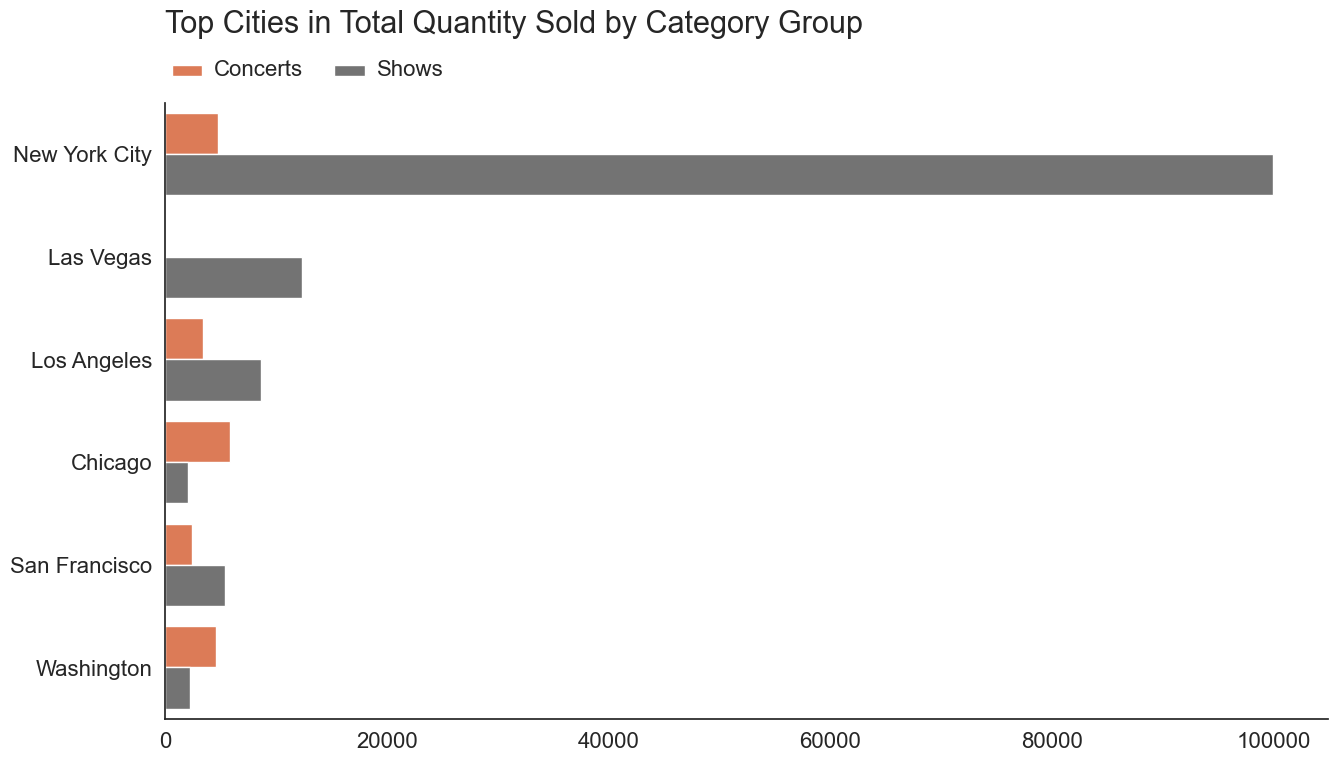

In [14]:

sns.set()
sns.set_style("white")

fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.barplot(x="total_sold_by_cat", y="city", data=popular_cities_catgroup, hue="group_cat",
                 palette=["#F27141", "#737373"])
sns.despine()
ax.set_title("Top Cities in Total Quantity Sold by Category Group",
             fontsize=22, loc="left", y=1.10)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

legend = ax.legend(loc="upper left",
                   bbox_to_anchor=(0, 1.08),
                   ncol=2,
                   borderaxespad=0,
                   frameon=False)

for text in legend.get_texts():
    text.set_fontsize(16)

plt.show()

## Conclusion
After wrapping up the project, there were a few key takeaways. The first of those being that the website is a strong platform for users to sell tickets. They take a reasonable amount of commission, but leave most of the revenue to the users. The strongest months to sell are between March and October. The highest selling tickets are from the concert group, more specifically the pop category. New York City and Las Vegas are the best cities to sell tickets in the shows category and California is the best state for concert tickets. All in all I would recommend this website to anyone looking to sell these types of tickets. The data proves that the majority of users will be successful in the use of the information provided.